# <img style="float: left; padding-right: 0.7cm; width: 3.0cm" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/179px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"> IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2022-1**<br>
**Profesora:** Paula Aguirre <br>

----

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

 <h1><center>Actividad 3: Combinación y agrupación de datos. </center></h1>
    
## Instrucciones Generales.

- Fecha de entrega: 27 de septiembre de 2022, 11:20 am.

- Vía de entrega: GitHub


## Caso de Estudio y Datos del Problema.

En este ejercicio, buscamos construir un dataset limpio para analizar el mercado inmobiliario y servicios urbanos en la región Metropolitana. En particular, se estudiarán las relaciones entre precios de propiedades en venta, existencia de escuelas, plazas y accesibilidad a transporte público en las zonas censales de la provincia de Santiago.

Para este análisis, utilizaremos los siguientes datasets:

**Datos de propiedades a la venta en Portal Inmobiliario:** `casas_venta_portalInmobiliario_clean.csv` <br>
Este conjunto de datos fue obtenido mediante web scrapping de la página web www.portalinmobiliario.com, y contiene información relativa a la ubicación, característica y precio de las propiedades en venta. Los datos ya han sido pre-procesados. Considere que la coordenadas de las propiedades están expresadas en el sistema de coordenadas geográficas WGS84 (EPSG:4326). 

**Cartografía censal:** `R13/ZONA_C17.shp`<br>
 Cartografía de las zonas censales de la region Metropolitana, de acuerdo al Censo 2017. Cada zona se identifica por un código único denominado `GEOCÓDIGO`.<br>

**Datos de indicadores urbanos:** `SIEDU/EDUCACION_BASICA.gpkg`,`SIEDU/PARADEROS_TRANSPORTE.gpkg`,`SIEDU/PLAZAS.gpkg`<br>
El Sistema de Indicadores y Estándares de calidad de vida y Desarrollo Urbano (SIEDU) tiene por objetivo identificar la desigualdad territorial en calidad de vida urbana dentro y entre las ciudades chilenas; mediante la medición de aquellos atributos urbanos relacionados con la calidad de vida urbana. A noviembre de 2019, se han publicado 37 indicadores correspondientes a 117 comunas, las que representan a más de 14 de millones personas, es decir, el 75% de la población del país. Los datos son de libre acceso en el sitio web: ``siedu.ine.cl''.

## 1. Combinación de datos.

### 1.1 Combine el dataset de propiedades  con la cartografía de las zonas censales de la región metropolitana, y asigne a cada propiedad el GEOCÓDIGO de la zona dentro de la cual está ubicada. Considere sólo las zonas correspondientes a la **provincia de Santiago**. <br>
- Primero, convierta el dataset de propiedades a un GeoDataframe, usando la función geopandas.points_from_xy() para crear la columna `geometry`.

https://geopandas.org/en/stable/docs/reference/api/geopandas.points_from_xy.html

- De la cartografía censal, seleccione sólo las zonas correspondientes a la provincia de Santiago.

- Realice un join espacial entre los dos GeoDataframes anteriores.

https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html


In [2]:
df_propiedades=pd.read_csv('casas_venta_portalInmobiliario_clean.csv')
df_propiedades.head()

,m2_util,latitud,longitud,dormitorios,precio_UF_m2util
0,320.0,-33.251942,-70.764053,4.0,37.500000
1,160.0,-33.639503,-70.882408,3.0,45.833333
2,135.0,-33.751636,-70.899918,3.0,48.148148
3,400.0,-33.632984,-70.808121,4.0,30.000000
4,250.0,-33.730312,-70.543060,4.0,36.000000


In [5]:
#complete este código 
gdf_propiedades=gpd.GeoDataFrame(df_propiedades,geometry=gpd.points_from_xy(df_propiedades.longitud,df_propiedades.latitud),crs=4326)

In [6]:
#Leer cartografía censal y convertir a crs 4326
zonas=gpd.read_file('R13/ZONA_C17.shp').to_crs(4326)
zonas.head()

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,DISTRITO,LOC_ZON,GEOCODIGO,SHAPE_Leng,SHAPE_Area,geometry
0,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13404,PAINE,PAINE,1,3,13404011003,0.030604,0.000043,"POLYGON ((-70.72732 -33.80301, -70.72713 -33.8..."
1,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13404,PAINE,PAINE,1,2,13404011002,0.045283,0.000071,"POLYGON ((-70.70792 -33.80101, -70.70783 -33.8..."
2,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13404,PAINE,PAINE,6,4,13404061004,0.084715,0.000102,"POLYGON ((-70.70724 -33.80454, -70.70712 -33.8..."
3,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13404,PAINE,PAINE,6,1,13404061001,0.052736,0.000112,"POLYGON ((-70.74243 -33.81015, -70.74262 -33.8..."
4,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13404,PAINE,PAINE,6,2,13404061002,0.024273,0.000035,"POLYGON ((-70.73996 -33.80852, -70.73929 -33.8..."


In [7]:
# seleccione las zonas censales correspondientes a la provincia de Santiago
zonas=zonas[zonas['NOM_PROVIN']=='SANTIAGO']

In [14]:
#complete este código
propiedades_zona=gpd.sjoin(gdf_propiedades,zonas[['GEOCODIGO','geometry']],how='inner' ,predicate='intersects')
propiedades_zona.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 13214 entries, 6 to 18087
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   m2_util           13214 non-null  float64 
 1   latitud           13214 non-null  float64 
 2   longitud          13214 non-null  float64 
 3   dormitorios       13214 non-null  float64 
 4   precio_UF_m2util  13214 non-null  float64 
 5   geometry          13214 non-null  geometry
 6   index_right       13214 non-null  int64   
 7   GEOCODIGO         13214 non-null  object  
dtypes: float64(5), geometry(1), int64(1), object(1)
memory usage: 929.1+ KB


### 1.2 Datos de servicios: utilizando las 3 capas vectoriales entregadas (paraderos, educación básica y plazas), genera un dataframe combinado con el número (value counts) de colegios, paraderos y plazas en cada zona de la provincia de Santiago, de la siguiente forma:

| |GEOCODIGO|Nplazas|Ncolegios|Nparaderos|  
|-----|-------|------|-----|-----|
|0	|13124071004	|0.0	|0.0|	2.0|
1	|13124071005|	1.0	|0.0	|10.0|
2	|13124081001|	2.0	|0.0	|0.0|
|...| | | | | 

Esta dataframe debe tener tantas filas como zonas existen en la provincia de Santiago. 
- Para cada capa vectorial: lea el archivo, realice un join espacial con el GeoDataframe con las zonas de Santiago, para asignar el correpondiente GEOCODIGO a cada registro.
- Utilice funciones de agregación como `groupby`o `pivot_table` para obtener el número de cuentas de colegios, paraderos y plazas por zona (GEOCODIGO)

In [15]:
#leer datos
paraderos=gpd.read_file('SIEDU/PARADEROS_TRANSPORTE.gpkg',driver='GPKG')
educ=gpd.read_file('SIEDU/EDUCACION_BASICA.gpkg',driver='GPKG')
plazas=gpd.read_file('SIEDU/PLAZAS.gpkg',driver='GPKG')

In [17]:
#unir (spatial join) con zonas, asignar zona a cada elemento
educ=gpd.sjoin(educ,zonas[['GEOCODIGO','geometry']],how='inner',op='within').reset_index(drop=True)

paraderos=gpd.sjoin(paraderos,zonas[['GEOCODIGO','geometry']],how='inner',op='within').reset_index(drop=True)

plazas=gpd.sjoin(plazas,zonas[['GEOCODIGO','geometry']],how='inner',op='within').reset_index(drop=True)

In [18]:
#agrupar por zona, contar colegios por zona
neduc=educ[['GEOCODIGO','LATITUD']].groupby('GEOCODIGO').agg('count').reset_index()
neduc=neduc.rename(columns={'LATITUD':'Ncolegios'})
neduc

,GEOCODIGO,Ncolegios
0,13101031004,1
1,13101031006,1
2,13101041001,1
3,13101041004,1
4,13101051001,1
...,...,...
682,13131071003,1
683,13131071004,1
684,13132021005,1
685,13132051002,1


In [19]:
#agrupar por zona, contar paraderos por zona
npar=paraderos[['GEOCODIGO','stop_name']].groupby('GEOCODIGO').agg('count').reset_index()
npar=npar.rename(columns={'stop_name':'Nparaderos'})
npar

,GEOCODIGO,Nparaderos
0,13101011001,6
1,13101011002,8
2,13101011003,9
3,13101011004,8
4,13101011005,4
...,...,...
1381,13132041007,1
1382,13132041008,4
1383,13132051001,11
1384,13132051002,9


In [20]:
#agrupar por zona, contar plazas por zona

nplazas=plazas[['GEOCODIGO','CUT']].groupby('GEOCODIGO').agg('count').reset_index()
nplazas=nplazas.rename(columns={'CUT':'Nplazas'})
nplazas

,GEOCODIGO,Nplazas
0,13101011001,1
1,13101011004,1
2,13101021001,4
3,13101021003,1
4,13101021005,4
...,...,...
1213,13132041007,6
1214,13132041008,1
1215,13132051001,6
1216,13132051002,10


In [21]:
#a la capa de zonas, unir la cantidad de colegios, plazas y paraderos
zonas=zonas.merge(nplazas,on='GEOCODIGO',how='left')
zonas=zonas.merge(neduc,on='GEOCODIGO',how='left')
zonas=zonas.merge(npar,on='GEOCODIGO',how='left')

zonas.head(5)

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,DISTRITO,LOC_ZON,GEOCODIGO,SHAPE_Leng,SHAPE_Area,geometry,Nplazas,Ncolegios,Nparaderos
0,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13124,PUDAHUEL,EL CAMBUCHO,7,4,13124071004,0.044334,0.000067,"POLYGON ((-70.86236 -33.39762, -70.86255 -33.3...",NaN,NaN,2.0
1,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13124,PUDAHUEL,NOVICIADO ALTO,7,5,13124071005,0.050539,0.000087,"POLYGON ((-70.87151 -33.40417, -70.87152 -33.4...",1.0,NaN,10.0
2,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13124,PUDAHUEL,VILLA CAMPO ALEGRE,8,1,13124081001,0.009700,0.000005,"POLYGON ((-70.81704 -33.38777, -70.81704 -33.3...",2.0,NaN,NaN
3,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13112,LA PINTANA,LA PINTANA,4,2,13112041002,0.018371,0.000020,"POLYGON ((-70.64114 -33.56398, -70.64121 -33.5...",3.0,NaN,3.0
4,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13121,PEDRO AGUIRRE CERDA,PEDRO AGUIRRE CERDA,2,1,13121021001,0.037389,0.000043,"POLYGON ((-70.65571 -33.47856, -70.65575 -33.4...",1.0,2.0,7.0


In [29]:
#opcional: seleccionar columnas y generar un dataframe resumido, rellenar Nan con 0's
servicios=zonas[['NOM_COMUNA','GEOCODIGO','geometry','Nplazas','Ncolegios','Nparaderos']]
servicios=servicios.fillna(0)
servicios.head()

,NOM_COMUNA,GEOCODIGO,geometry,Nplazas,Ncolegios,Nparaderos
0,PUDAHUEL,13124071004,"POLYGON ((-70.86236 -33.39762, -70.86255 -33.3...",0.0,0.0,2.0
1,PUDAHUEL,13124071005,"POLYGON ((-70.87151 -33.40417, -70.87152 -33.4...",1.0,0.0,10.0
2,PUDAHUEL,13124081001,"POLYGON ((-70.81704 -33.38777, -70.81704 -33.3...",2.0,0.0,0.0
3,LA PINTANA,13112041002,"POLYGON ((-70.64114 -33.56398, -70.64121 -33.5...",3.0,0.0,3.0
4,PEDRO AGUIRRE CERDA,13121021001,"POLYGON ((-70.65571 -33.47856, -70.65575 -33.4...",1.0,2.0,7.0


### 1.3 A partir de los dataframes de propiedades y de servicios generados en los puntos anteriores, construya el (geo)dataframe final para su análisis, con las siguientes columnas:

| |GEOCODIGO|geometry|m2_util|latitud|longitud|	dormitorios|precio_UF_m2util|NOM_COMUNA|Nplazas|Ncolegios|Nparaderos|
|-----|-------|------|-----|-----|-----|-------|------|-----|-----|-----|-----|
|0|	13110051001|POLYGON ((-70.57501 -33.51261, -70.57518 -33.5...|	172.00|-33.510170|	-70.587784	|4.0|	110.465116	|LA FLORIDA	|6.0|	4.0	|16.0|
|1|	13110021001	|POLYGON ((-70.58818 -33.51029, -70.58735 -33.5...|	40.00|-33.513435|	-70.588692|	2.0	|65.000000|	LA FLORIDA|	5.0|0.0|9.0|
|...| | | | | | | | || |

- Este geodataframe tiene una file por cada propiedad del dataset del Portal Inmobiliario.

In [25]:
#unir propiedades y servicios por zona
props=propiedades_zona.merge(servicios,on='GEOCODIGO',how='left').reset_index(drop=True)
props.drop(columns=['index_right'],inplace=True)

In [27]:
props.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 13214 entries, 0 to 13213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   m2_util           13214 non-null  float64 
 1   latitud           13214 non-null  float64 
 2   longitud          13214 non-null  float64 
 3   dormitorios       13214 non-null  float64 
 4   precio_UF_m2util  13214 non-null  float64 
 5   geometry          13214 non-null  geometry
 6   GEOCODIGO         13214 non-null  object  
 7   NOM_COMUNA        13214 non-null  object  
 8   Nplazas           13214 non-null  float64 
 9   Ncolegios         13214 non-null  float64 
 10  Nparaderos        13214 non-null  float64 
dtypes: float64(8), geometry(1), object(2)
memory usage: 1.1+ MB


In [28]:
props.head()

,m2_util,latitud,longitud,dormitorios,precio_UF_m2util,geometry,GEOCODIGO,NOM_COMUNA,Nplazas,Ncolegios,Nparaderos
0,620.0,-33.367367,-70.575691,8.0,61.290323,POINT (-70.57569 -33.36737),13132031001,VITACURA,2.0,0.0,6.0
1,1600.0,-33.371872,-70.568260,4.0,78.125000,POINT (-70.56826 -33.37187),13132031001,VITACURA,2.0,0.0,6.0
2,550.0,-33.371590,-70.561897,5.0,74.181818,POINT (-70.56190 -33.37159),13132031001,VITACURA,2.0,0.0,6.0
3,700.0,-33.362920,-70.552511,4.0,71.428571,POINT (-70.55251 -33.36292),13132031001,VITACURA,2.0,0.0,6.0
4,500.0,-33.364151,-70.558403,5.0,74.000000,POINT (-70.55840 -33.36415),13132031001,VITACURA,2.0,0.0,6.0


### 1.4 BONUS: Genere un mapa de distribución de colegios en la provincia de Santiago, que incluya:
- Ubicación de colegios (puntos).
- Zonas coloreadas de acuerdo a la cantidad de colegios existentes en ella.

Este mapa le servirá como medio de verificación de sus operaciones de unión y agregación de datos.

<AxesSubplot:>

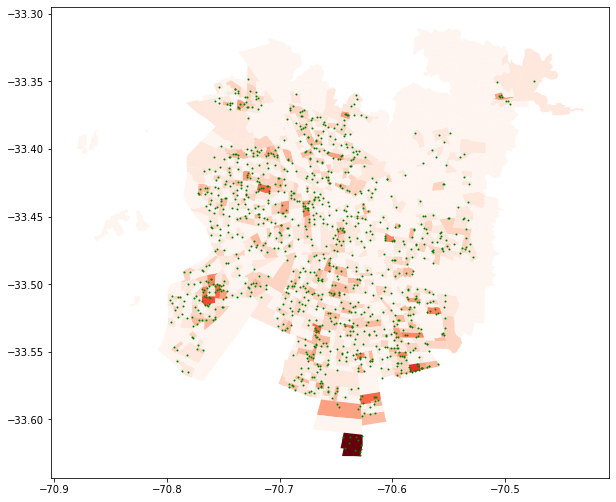

In [38]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

servicios.plot(ax=ax,column='Ncolegios',cmap='Reds')
educ.plot(ax=ax,marker='.',color='g',markersize=4)